In [93]:
mask_airDB = 'https://raw.githubusercontent.com/ManJ-PC/FMUPBioestatistica/master/mask_air.csv?token=GHSAT0AAAAAAB4H7ZCBDEFD3S3A5NN77SMCY6W5A2Q'

In [91]:
symptoms_medicationDB = "https://raw.githubusercontent.com/ManJ-PC/FMUPBioestatistica/master/sample_symptoms_medication.csv?token=GHSAT0AAAAAAB4H7ZCAPVPEDYOCR7EVZOLWY6W5AHQ"

In [88]:
sample_usersDB = "https://raw.githubusercontent.com/ManJ-PC/FMUPBioestatistica/master/sample_users.csv?token=GHSAT0AAAAAAB4H7ZCBZDPNUJU654WGJUDGY6W46HQ"

In [94]:
ma_df <- read.csv(file = mask_airDB)

In [69]:
ma_df

X,user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,48,56,NL,0,M,111007,08/04/2016,77,81,NA,B_single_medication,A_no_medication
2,2,1026,19,GB,1,M,290424,06/10/2015,59,38,NA,C_comedication,A_no_medication
3,3,1638,47,FR,0,F,368522,18/02/2019,52,5,0,A_no_medication,A_no_medication
4,3,1638,47,FR,0,F,367628,20/11/2015,0,0,6,A_no_medication,A_no_medication
5,3,1638,47,FR,0,F,367798,17/09/2016,8,0,2,A_no_medication,A_no_medication
6,4,2064,51,FR,1,F,393432,25/12/2015,40,25,NA,A_no_medication,A_no_medication
7,5,2076,23,GB,1,F,393928,26/12/2015,3,3,NA,A_no_medication,A_no_medication
8,5,2076,23,GB,1,F,394299,21/01/2017,9,0,0,A_no_medication,A_no_medication
9,5,2076,23,GB,1,F,394107,02/07/2016,15,0,0,A_no_medication,A_no_medication


In [95]:
sm_df <- read.csv(file = symptoms_medicationDB)

In [96]:
su_df <- read.csv(file = sample_usersDB)

In [97]:
library(dplyr)

In [98]:
# 1.1
n_distinct(ma_df$user_id)

[1] 788

In [99]:
# 1.1. Quantos utilizadores únicos existem em cada uma das bases de dados?

n_distinct(sm_df$member_id)

[1] 788

In [101]:
# 1.1
n_distinct(su_df$user_id)

[1] 788

In [102]:
# 1.2. Quantos registos distintos de sintomas existem?

n_distinct(sm_df$symptoms_id)

[1] 1000

In [103]:
# 1.3. Una as duas bases de dados tendo como referência a variável que considerar mais adequada. Grave a união destas bases de dados num novo objeto intitulado “mask_air”. Por fim, guarde este objeto no computador, em formato .csv, com o nome “mask_air.csv”.

mask_air = left_join(su_df, sm_df, by = 'member_id')

In [104]:
mask_air2 = full_join(su_df, sm_df, by = 'member_id', all = true)

In [105]:
mask_air2

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,48,56,NL,0,M,111007,08/04/2016,77,81,NA,B_single_medication,A_no_medication
2,1026,19,GB,1,M,290424,06/10/2015,59,38,NA,C_comedication,A_no_medication
3,1638,47,FR,0,F,368522,18/02/2019,52,5,0,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367628,20/11/2015,0,0,6,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367798,17/09/2016,8,0,2,A_no_medication,A_no_medication
4,2064,51,FR,1,F,393432,25/12/2015,40,25,NA,A_no_medication,A_no_medication
5,2076,23,GB,1,F,393928,26/12/2015,3,3,NA,A_no_medication,A_no_medication
5,2076,23,GB,1,F,394299,21/01/2017,9,0,0,A_no_medication,A_no_medication
5,2076,23,GB,1,F,394107,02/07/2016,15,0,0,A_no_medication,A_no_medication


In [108]:
mask_air %>%
  filter(age == 17)

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
52,32016,17,AU,1,F,4709,29/01/2017,58,1,4,B_single_medication,A_no_medication
125,63681,17,MX,0,F,55805,28/05/2017,18,39,0,A_no_medication,A_no_medication
134,65547,17,MX,0,M,59198,05/07/2017,27,14,40,A_no_medication,A_no_medication
210,85389,17,BR,0,F,97891,06/02/2018,85,2,26,C_comedication,A_no_medication
220,87435,17,BR,1,M,102591,15/10/2017,49,33,10,B_single_medication,A_no_medication
263,99783,17,MX,0,M,124047,26/06/2018,30,43,27,A_no_medication,A_no_medication
313,108681,17,NL,0,F,150251,06/05/2018,0,11,7,B_single_medication,C_comedication
460,156729,17,MX,0,M,223767,17/03/2019,0,0,0,C_comedication,A_no_medication


In [109]:
mask_air

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,48,56,NL,0,M,111007,08/04/2016,77,81,NA,B_single_medication,A_no_medication
2,1026,19,GB,1,M,290424,06/10/2015,59,38,NA,C_comedication,A_no_medication
3,1638,47,FR,0,F,368522,18/02/2019,52,5,0,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367628,20/11/2015,0,0,6,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367798,17/09/2016,8,0,2,A_no_medication,A_no_medication
4,2064,51,FR,1,F,393432,25/12/2015,40,25,NA,A_no_medication,A_no_medication
5,2076,23,GB,1,F,393928,26/12/2015,3,3,NA,A_no_medication,A_no_medication
5,2076,23,GB,1,F,394299,21/01/2017,9,0,0,A_no_medication,A_no_medication
5,2076,23,GB,1,F,394107,02/07/2016,15,0,0,A_no_medication,A_no_medication


In [57]:
x <- mask_air %>% filter(age==17)

In [58]:
x

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
52,32016,17,AU,1,F,4709,29/01/2017,58,1,4,B_single_medication,A_no_medication
125,63681,17,MX,0,F,55805,28/05/2017,18,39,0,A_no_medication,A_no_medication
134,65547,17,MX,0,M,59198,05/07/2017,27,14,40,A_no_medication,A_no_medication
210,85389,17,BR,0,F,97891,06/02/2018,85,2,26,C_comedication,A_no_medication
220,87435,17,BR,1,M,102591,15/10/2017,49,33,10,B_single_medication,A_no_medication
263,99783,17,MX,0,M,124047,26/06/2018,30,43,27,A_no_medication,A_no_medication
313,108681,17,NL,0,F,150251,06/05/2018,0,11,7,B_single_medication,C_comedication
460,156729,17,MX,0,M,223767,17/03/2019,0,0,0,C_comedication,A_no_medication


In [53]:
# 1.4. Indique quantos utilizadores únicos com 17 anos de idade ou menos existem nesta base de dados
mask_air1p4 <- filter(mask_air, age == 17)

In [54]:
mask_air1p4

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
52,32016,17,AU,1,F,4709,29/01/2017,58,1,4,B_single_medication,A_no_medication
125,63681,17,MX,0,F,55805,28/05/2017,18,39,0,A_no_medication,A_no_medication
134,65547,17,MX,0,M,59198,05/07/2017,27,14,40,A_no_medication,A_no_medication
210,85389,17,BR,0,F,97891,06/02/2018,85,2,26,C_comedication,A_no_medication
220,87435,17,BR,1,M,102591,15/10/2017,49,33,10,B_single_medication,A_no_medication
263,99783,17,MX,0,M,124047,26/06/2018,30,43,27,A_no_medication,A_no_medication
313,108681,17,NL,0,F,150251,06/05/2018,0,11,7,B_single_medication,C_comedication
460,156729,17,MX,0,M,223767,17/03/2019,0,0,0,C_comedication,A_no_medication


In [114]:
?mean


In [133]:
su_df['asthma']

asthma
<int>
0
1
0
1
1
0
0
1
0


In [131]:
# 1.5. Calcule o valor mediano e o âmbito interquartil da variável vas_asthma para utilizadores com e sem asma.

result.mean <- mean(su_df['asthma'])#,trim = 0.25)

Warning message in mean.default(su_df["asthma"]):
“argument is not numeric or logical: returning NA”


In [134]:
mean(su_df$asthma)

[1] 0.3743655

In [136]:
sem_asthma <- filter(mask_air, asthma == 0)

In [137]:
com_asthma <- filter(mask_air, asthma == 1)

In [141]:
sem_asthma$vas_asthma

[1]  NA   0   6   2  NA   8  16   0   1   0   0  NA  NA  NA  15   0  14  98
 [19]   5  NA  NA  16   9   0   1   0   1   1   2   1   3   1   0  12   0  18
 [37]   0  11   0   3  10  84   0  18   1   0  17   7  42   2   0   0   4   0
 [55]  10   0   0   1   0   0   2   6   0   0   2   0   0   0   2   7   3  32
 [73]   3  21   3  99   4  14   0   0   0   3   0   0  11  18   6   1   0   4
 [91]   0  48  51  66   4  32   1   1   5   0   0   0   0   2   3   0   2   0
[109]   0   4  30   8  14   7  10  40   0   5   0   3   2   0   0   0   1   3
[127]   0   0   0   0   3   0   3   0   0   7  61  13   3   0   0   3   3   0
[145]  22   0   3   0   5  46   8  10   0   0  16  11   0   4   0   1   4   0
[163]  12   3   1   0   1   0   3   0   0   0   0   0   0  26   3   0   0   0
[181]   0   3   0   5   4   0   2   4   0   2   0   3   0   3  64   2   4   0
[199]  23  26  17   6  27   0   0  31   0   1   0   0   0   0  12   0  75   0
[217]   0   0  13  27   0  21   1   0   0  46   0   0   0   1  10   2   4   6
[235]   8  26   2   5   3   1   1   5  12   4   1  62   0   1   7  64  34   6
[253]  35   3   2   0   0   7   0   2   1   0  37   1   4   6   1   5   1   3
[271]   3   0   0   0   3   0  36  69  17  14   2   2  38   3   3 100   6   1
[289]   0  88   0  53   5   0  81   2  25  70  11  67   3   4   0   2   0   6
[307]  25  14  29  19  48   0   9   3   0  19  11  34   4   2  10  58  58   0
[325]   2   3  10  55   0  15  12   2   3   3   4   2   6   3   0   0   0  12
[343]   0   3   1   0   0   2   0   5   0  53   7  13  21   5  60   2   0   6
[361]   5  11   0   0   0   0   0   0  90   0   0   2   0   0   2   0  51   0
[379]  11  22   7   8   0  10   0   2  11  13   0   0   0   3   3   0   4   0
[397]  87   4   4  15  60  48 100  15   9   5   0   1   1   3   0   3   8  27
[415]   0   6   9   4   4   7  10  17  14  16  31   9  18   0   1   0  33  11
[433]  12   4  19  16   1   4  10   0   5  21   6  13  17   3   0   3   0   3
[451]   0   0   3  16  12   0   7   2   8   1  11   0   2   0   1   7  23  26
[469]  30   6   0   3   0   0   4   9  15   0   0  25   0  25   3  34   2  30
[487]  19   4   2  16  48   4   3  60  50  54  71  77  51  19  42   2   3   3
[505]  22  15   6  11  14  17  16  15  91   1  75   0  31   7   0   2  40  29
[523]  35   0   0   2   2   3   2   5  19   0   2   0  67  37  44   0   0   3
[541]  21   0   0   8   9   0   6   2   3   4   1   3   3   1   1   0   0   6
[559]   0   2   0  10  18   5   6   1   4   0   2   3  25   8  80  25  17   3
[577]   3   0   0   1   8   1   8   0   7   0  77   1  20   2   0   0   9   8
[595]   2   0  76   7  15  21   6  12  34   2  53   4   0  77  13   9  25   5
[613]   1  19   3   4  92   0   4   0  19   0   3   2  60  39   1   5   0   4
[631]   4   2

In [140]:
mean(sem_asthma$vas)

Warning message in mean.default(sem_asthma):
“argument is not numeric or logical: returning NA”


[1] NA

In [148]:
mean(sem_asthma$vas_asthma, na.rm=TRUE) # há outliers muito grandes

[1] 11.0768

In [146]:
median(sem_asthma$vas_asthma, na.rm=TRUE) # há outliers muito grandes

[1] 3

In [150]:
mean(com_asthma$vas_asthma, na.rm=TRUE) # há outliers muito grandes

[1] 8.203297

In [147]:
median(com_asthma$vas_asthma, na.rm=TRUE) # há outliers enormes

[1] 2

In [155]:
ma_df %>% group_by(asthma) %>% summarise(vas_asthma_median = median(vas_asthma, na.rm=TRUE), vas_asthma_iqr = IQR(vas_asthma, na.rm=TRUE))

asthma,vas_asthma_median,vas_asthma_iqr
<int>,<dbl>,<dbl>
0,3,12
1,2,9


In [138]:
sem_asthma

user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,48,56,NL,0,M,111007,08/04/2016,77,81,NA,B_single_medication,A_no_medication
3,1638,47,FR,0,F,368522,18/02/2019,52,5,0,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367628,20/11/2015,0,0,6,A_no_medication,A_no_medication
3,1638,47,FR,0,F,367798,17/09/2016,8,0,2,A_no_medication,A_no_medication
6,2082,72,PL,0,F,394940,12/01/2016,21,24,NA,A_no_medication,A_no_medication
7,3138,67,DK,0,F,16242,08/05/2016,18,31,8,A_no_medication,B_single_medication
9,3954,38,BE,0,M,25433,09/08/2016,9,10,16,C_comedication,A_no_medication
11,4458,40,IT,0,F,32663,15/09/2016,8,3,0,B_single_medication,A_no_medication
11,4458,40,IT,0,F,33290,14/06/2018,14,9,1,A_no_medication,A_no_medication


In [ ]:
mean(mask_air)

In [135]:
IQR(su_df$asthma)

[1] 1

In [117]:
mean(vas_asthma)  

ERROR: ignored

In [ ]:
# 1.6. Calcule o valor médio e o desvio padrão da variável vas_nose para utilizadores que fazem alguma terapêutica para a rinite alérgica e para utilizadores que não fazem nenhuma terapêutica para a rinite alérgica.

ma_df %>% group_by(rh) %>% summarise(height_mean = mean(height), height_sd = sd(height))


In [156]:
ma_df %>% group_by(rhinitis_medication) %>% summarise(vas_nose_mean = mean(vas_nose), vas_nose_st = IQR(vas_nose))

rhinitis_medication,vas_nose_mean,vas_nose_st
<chr>,<dbl>,<dbl>
A_no_medication,18.02814,25.0
B_single_medication,22.28383,26.5
C_comedication,27.07317,33.0


In [ ]:
ma_df_b = (filter(mask_air, rhinitis_medication == 'B_single_medication	')) 

In [159]:
ma_df

X,user_id,member_id,age,country,asthma,sex,symptoms_id,date,vas_nose,vas_eye,vas_asthma,rhinitis_medication,asthma_medication
<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,48,56,NL,0,M,111007,08/04/2016,77,81,NA,B_single_medication,A_no_medication
2,2,1026,19,GB,1,M,290424,06/10/2015,59,38,NA,C_comedication,A_no_medication
3,3,1638,47,FR,0,F,368522,18/02/2019,52,5,0,A_no_medication,A_no_medication
4,3,1638,47,FR,0,F,367628,20/11/2015,0,0,6,A_no_medication,A_no_medication
5,3,1638,47,FR,0,F,367798,17/09/2016,8,0,2,A_no_medication,A_no_medication
6,4,2064,51,FR,1,F,393432,25/12/2015,40,25,NA,A_no_medication,A_no_medication
7,5,2076,23,GB,1,F,393928,26/12/2015,3,3,NA,A_no_medication,A_no_medication
8,5,2076,23,GB,1,F,394299,21/01/2017,9,0,0,A_no_medication,A_no_medication
9,5,2076,23,GB,1,F,394107,02/07/2016,15,0,0,A_no_medication,A_no_medication


In [160]:
ma_df_bc <- mutate(ma_df, rhinitis_med = ifelse(rhinitis_medication == 'B_single_medication' & rhinitis_medication == 'C_comedication', 'Medication',
 ifelse(rhinitis_medication == 'A_no_medication')
 ))

ERROR: ignored

In [ ]:
sem_asthma <- filter(mask_air, asthma == 0)

In [1]:
# 1. Regras de Associação:
# 1.1. Apriori

install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [2]:
url = 'https://raw.githubusercontent.com/Prof-Rodrigo-Silva/ScriptR/master/R%20-%20Avan%C3%A7ado%20-%20Data%20Mining/GroceryStoreDataSet.csv'

In [3]:
base2 = read.transactions(url)
summary(base2)

transactions as itemMatrix in sparse format with
 20 rows (elements/itemsets/transactions) and
 17 columns (items) and a density of 0.05882353 

most frequent items:
,,BISCUIT,CORNFLAKES,,,,,COCK,COFFEE,            ,BREAD,,,,,,,,COFFEE,SUGAR 
                                    2                                     2 
          ,BREAD,,,TEA,BOURNVITA,,,,,        ,,,,,BOURNVITA,,,,COFFEE,SUGAR 
                                    2                                     1 
      ,,,CORNFLAKES,,,,,,COFFEE,SUGAR                               (Other) 
                                    1                                    12 

element (itemset/transaction) length distribution:
sizes
 1 
20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

includes extended item information - examples:
                           labels
1  ,,,,,BOURNVITA,,,,COFFEE,SUGAR
2 ,,,CORNFLAKES,,,,,,COFFEE,SUGAR
3    ,,,CORNFLAKES,TEA,,,MAGGI,,,

In [ ]:
base3 = read.transactions(url, header = F,sep = ",",rm.duplicates = T)
summary(base3)

transactions as itemMatrix in sparse format with
 20 rows (elements/itemsets/transactions) and
 11 columns (items) and a density of 0.3 

most frequent items:
     BREAD     COFFEE    BISCUIT        TEA CORNFLAKES    (Other) 
        13          8          7          7          6         25 

element (itemset/transaction) length distribution:
sizes
 2  3  4 
 1 12  7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     3.3     4.0     4.0 

includes extended item information - examples:
     labels
1   BISCUIT
2 BOURNVITA
3     BREAD

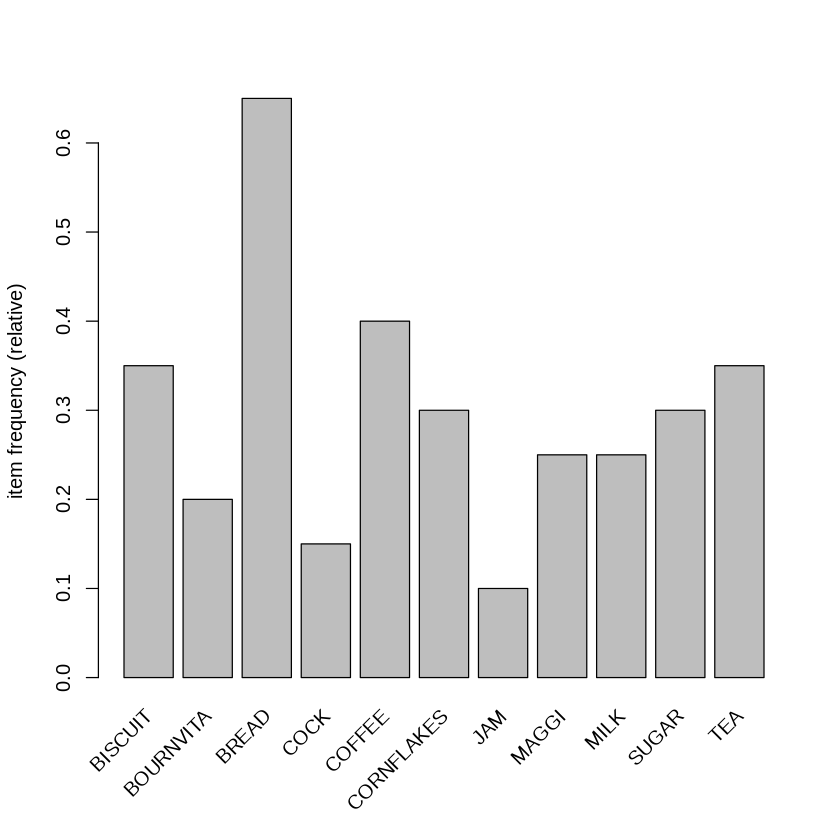

In [ ]:
itemFrequencyPlot(base3)

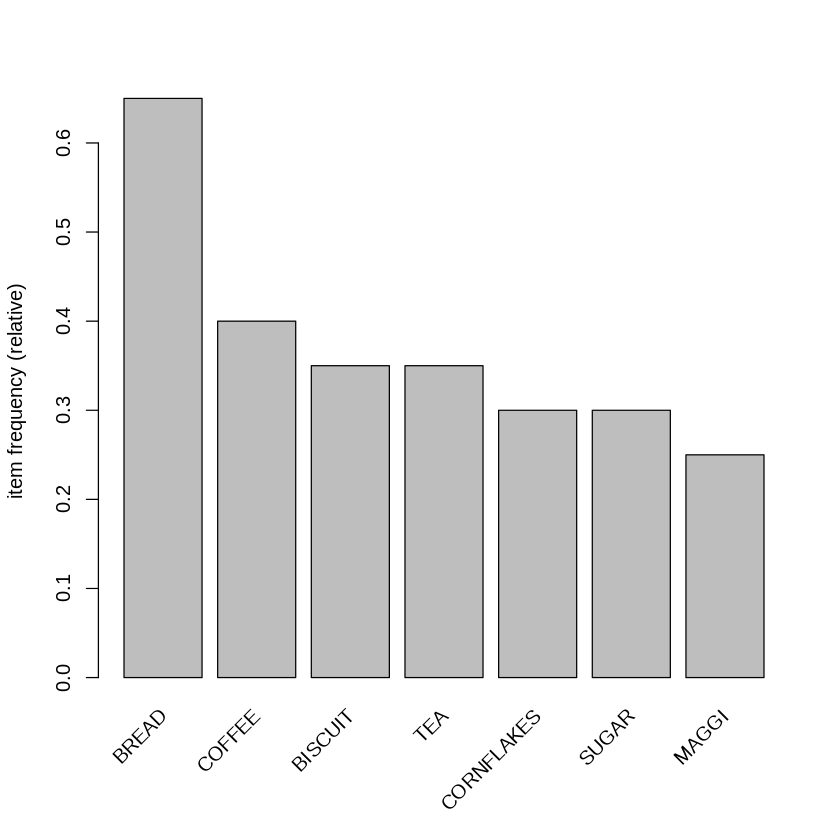

In [ ]:
itemFrequencyPlot(base3, top=7)

In [ ]:
regras = apriori(base3, parameter = list(sup = 0.1, conf = 0.5)) # do pacote arules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 20 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [55 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(regras) # loja vende água pode vender bala, cigarro. mas o foco da empresa é água (nas regras de associação vai sempre aparecer!)
# qual a água mineral é óbvio o produto sair, quem compra salgainho compra água (que se repete, o produto). Pode se eliminar os produtos, água e ...
# lojas que vendem gás e que vendem água! Produtos alimentícios em geral.. Mate etc
# O foco da empresa é água!
# eliminar a água e ver o que a empresa vende fora a água!
# utilizar o sort, pois vai dar uma ordenada

     lhs                              rhs          support confidence coverage
[1]  {}                            => {BREAD}      0.65    0.6500000  1.00    
[2]  {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[3]  {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[4]  {COCK}                        => {CORNFLAKES} 0.10    0.6666667  0.15    
[5]  {COCK}                        => {BISCUIT}    0.10    0.6666667  0.15    
[6]  {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[7]  {BOURNVITA}                   => {SUGAR}      0.10    0.5000000  0.20    
[8]  {BOURNVITA}                   => {TEA}        0.10    0.5000000  0.20    
[9]  {BOURNVITA}                   => {BREAD}      0.15    0.7500000  0.20    
[10] {MILK}                        => {BREAD}      0.20    0.8000000  0.25    
[11] {MAGGI}                       => {TEA}        0.20    0.8000000  0.25    
[12] {TEA}                         => {MAGGI}      0

In [ ]:
inspect(sort(regras, by="confidence")[1:30])

     lhs                              rhs          support confidence coverage
[1]  {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[2]  {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[3]  {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[4]  {JAM, MAGGI}                  => {BREAD}      0.10    1.0000000  0.10    
[5]  {BREAD, JAM}                  => {MAGGI}      0.10    1.0000000  0.10    
[6]  {COCK, CORNFLAKES}            => {BISCUIT}    0.10    1.0000000  0.10    
[7]  {BISCUIT, COCK}               => {CORNFLAKES} 0.10    1.0000000  0.10    
[8]  {COCK, CORNFLAKES}            => {COFFEE}     0.10    1.0000000  0.10    
[9]  {BISCUIT, COCK}               => {COFFEE}     0.10    1.0000000  0.10    
[10] {BISCUIT, COFFEE}             => {COCK}       0.10    1.0000000  0.10    
[11] {BOURNVITA, TEA}              => {BREAD}      0.10    1.0000000  0.10    
[12] {BISCUIT, MILK}               => {BREAD}      0

In [ ]:
regras1 = apriori(base3, parameter = list(sup=0.001, conf=0.5))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 20 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [112 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(regras1)

      lhs                              rhs          support confidence coverage
[1]   {}                            => {BREAD}      0.65    0.6500000  1.00    
[2]   {JAM}                         => {MILK}       0.05    0.5000000  0.10    
[3]   {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[4]   {JAM}                         => {TEA}        0.05    0.5000000  0.10    
[5]   {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[6]   {COCK}                        => {CORNFLAKES} 0.10    0.6666667  0.15    
[7]   {COCK}                        => {BISCUIT}    0.10    0.6666667  0.15    
[8]   {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[9]   {BOURNVITA}                   => {SUGAR}      0.10    0.5000000  0.20    
[10]  {BOURNVITA}                   => {TEA}        0.10    0.5000000  0.20    
[11]  {BOURNVITA}                   => {BREAD}      0.15    0.7500000  0.20    
[12]  {MILK}                        => {

In [ ]:
inspect(sort(regras1, by="confidence")[40:70])

     lhs                              rhs          support confidence coverage
[1]  {BISCUIT, COCK, CORNFLAKES}   => {COFFEE}     0.10    1.0000000  0.10    
[2]  {COCK, COFFEE, CORNFLAKES}    => {BISCUIT}    0.10    1.0000000  0.10    
[3]  {BISCUIT, COCK, COFFEE}       => {CORNFLAKES} 0.10    1.0000000  0.10    
[4]  {BISCUIT, COFFEE, CORNFLAKES} => {COCK}       0.10    1.0000000  0.10    
[5]  {CORNFLAKES, MILK, TEA}       => {COFFEE}     0.05    1.0000000  0.05    
[6]  {COFFEE, CORNFLAKES, MILK}    => {TEA}        0.05    1.0000000  0.05    
[7]  {COFFEE, MILK, TEA}           => {CORNFLAKES} 0.05    1.0000000  0.05    
[8]  {COFFEE, CORNFLAKES, TEA}     => {MILK}       0.05    1.0000000  0.05    
[9]  {BISCUIT, CORNFLAKES, MILK}   => {BREAD}      0.05    1.0000000  0.05    
[10] {BREAD, CORNFLAKES, MILK}     => {BISCUIT}    0.05    1.0000000  0.05    
[11] {BISCUIT, BREAD, CORNFLAKES}  => {MILK}       0.05    1.0000000  0.05    
[12] {BISCUIT, BREAD, MAGGI}       => {TEA}        0

In [ ]:
base = read.csv(url,header = F,sep = ",")
summary(base)

      V1                 V2                 V3                 V4           
 Length:20          Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      V5                 V6                 V7                 V8           
 Length:20          Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      V9                V10                V11           
 Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  